<a href="https://colab.research.google.com/github/celestemiriams/ML/blob/main/Insurance_Claim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling for Insurance Claims

In [137]:
#importing the necessary libraries
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_predict

## Task 1: Data Exploration and Preprocessing

In [136]:
#Loading the datasets
variable_description = pd.read_csv("VariableDescription.csv")
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")
sample_submission = pd.read_csv("SampleSubmission.csv")

### Explore the data description dataset

In [ ]:
#Explore the data structure of variable description dataset
variable_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     14 non-null     object
 1   Description  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [ ]:
variable_description.head(14)

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


### Explore the train and test datasets

In [ ]:
#Explore the data structure of the train dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [ ]:
#Show the first 5 rows of the train dataset
train_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [ ]:
#Show the last 5 rows of the train dataset
train_data.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3065 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3056 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   2341 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3056 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [ ]:
test_data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [ ]:
# Save the 'Customer_Id' before dropping it
train_customer_id = train_data['Customer Id'].copy()
test_customer_id = test_data['Customer Id'].copy()

In [ ]:
# Check if 'Customer Id' is in the DataFrame and drop it if it is
if 'Customer Id' in train_data.columns:
    train_data.drop('Customer Id', axis=1, inplace=True)
if 'Customer Id' in test_data.columns:
    test_data.drop('Customer Id', axis=1, inplace=True)

In [ ]:
#Check for duplicated values in the train dataset
train_data.duplicated().sum()

12

In [ ]:
#Check for unique values in categorical columns
train_data["Residential"].unique()

array([0, 1])

In [ ]:
train_data["YearOfObservation"].unique()

array([2013, 2015, 2014, 2012, 2016])

In [ ]:
train_data["Garden"].unique()

array(['V', 'O', nan], dtype=object)

In [ ]:
train_data["Building_Painted"].unique()

array(['N', 'V'], dtype=object)

In [ ]:
train_data["Building_Fenced"].unique()

array(['V', 'N'], dtype=object)

In [ ]:
train_data["Settlement"].unique()

array(['U', 'R'], dtype=object)

In [ ]:
train_data["Building_Type"].unique()

array([1, 2, 4, 3])

In [ ]:
train_data["NumberOfWindows"].unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [ ]:
train_data["Claim"].unique()

array([0, 1])

In [ ]:
train_data["Geo_Code"].unique()

array(['1053', '1143', '1160', ..., '2B096', '2B353', nan], dtype=object)

In [ ]:
train_data["Building Dimension"].unique()

array([ 290.,  490.,  595., ..., 4207., 1775., 1017.])

In [ ]:
train_data["Date_of_Occupancy"].unique()

array([1960., 1850., 1800., 1980., 1988., 2013., 2011., 1550., 1900.,
       2007., 1970., 1950., 1700., 1976., 1940., 1920., 1982.,   nan,
       1972., 2010., 1971., 1995., 2006., 1999., 1969., 1985., 1965.,
       1981., 1975., 1997., 2003., 1990., 1930., 1973., 1991., 1974.,
       1978., 1967., 1927., 1952., 1957., 2009., 1977., 1890., 1949.,
       1951., 2008., 1987., 2000., 1962., 1956., 1993., 1912., 1983.,
       1954., 1968., 2004., 1936., 1958., 1966., 1953., 1979., 1946.,
       1955., 2001., 1870., 1961., 2015., 1613., 1964., 1984., 2014.,
       2002., 1986., 1992., 2005., 2012., 1910., 1945., 1864., 1942.,
       1939., 1934., 1998., 1908., 1948., 1860., 1926., 1938., 1895.,
       1545., 1959., 1989., 1996., 1963., 1840., 2016., 1718., 1600.,
       1875., 1898., 1880., 1915., 1994., 1810., 1937., 1907., 1931.,
       1925., 1935., 1824., 1914., 1750., 1846., 1903., 1905., 1906.,
       1830., 1923., 1924., 1928., 1947., 1911., 1901., 1902., 1904.,
       1919., 1896.,

#### Preprocessing of Train and Test datasets

In [ ]:
#Assign category of the Building Type
building_type_map = {1: 'Type1', 2: 'Type2', 3: 'Type3', 4: 'Type4'}
# Use the pandas apply method to numerically encode Building_Type target variable
train_data['Building_Type'] = train_data["Building_Type"].apply(lambda x: building_type_map[x])
test_data['Building_Type'] = test_data["Building_Type"].apply(lambda x: building_type_map[x])

In [ ]:
#replacing some values in the NumberOfWindows column
train_data['NumberOfWindows'] = train_data['NumberOfWindows'].replace({'>=10': 10, '   .': -1})
test_data['NumberOfWindows'] = test_data['NumberOfWindows'].replace({'>=10': 10, '   .': -1})


#### Handle missing values in the train dataset

In [ ]:
#Check for the missing values in the train dataset
train_data.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [ ]:
#Check for missing values in the test dataset
test_data.isnull().sum()

YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

Columns with missing values: Building Dimension: 106, Garden: 7, Date_of_Occupancy: 508, Geo_Code: 102

In [ ]:
#Filling missing values using Imputation

train_data["Date_of_Occupancy"].fillna(0, inplace=True) #Marking missing values

train_data["Geo_Code"].fillna(value="Unknown", inplace=True)  # Mark missing values

test_data["Date_of_Occupancy"].fillna(0, inplace=True) #Marking missing values

test_data["Geo_Code"].fillna(value="Unknown", inplace=True)  # Using the mode to fill missing values

In [ ]:
train_data.tail(10)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7150,2014,1.000000,0,V,V,V,U,NaN,Type2,1962.0,-1,Unknown,0
7151,2014,0.030137,0,V,V,V,U,NaN,Type1,1970.0,-1,Unknown,0
7152,2012,1.000000,0,V,V,V,U,NaN,Type2,2001.0,-1,Unknown,1
7153,2013,1.000000,1,V,V,V,U,NaN,Type2,1950.0,-1,Unknown,0
7154,2012,1.000000,0,V,V,V,U,NaN,Type1,2001.0,-1,Unknown,1
7155,2012,1.000000,1,V,V,V,U,NaN,Type1,2001.0,-1,Unknown,0
7156,2013,1.000000,0,V,V,V,U,NaN,Type2,1980.0,-1,Unknown,1
7157,2016,0.038251,0,V,V,V,U,NaN,Type1,1992.0,-1,Unknown,0
7158,2013,1.000000,0,V,V,V,U,NaN,Type1,1972.0,-1,Unknown,0
7159,2014,1.000000,0,V,V,V,U,NaN,Type1,2004.0,-1,Unknown,0


In [ ]:
test_data.tail()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
3064,2015,1.0,0,V,V,V,U,NaN,Type4,1900.0,-1,Unknown
3065,2012,1.0,0,V,V,V,U,NaN,Type2,1948.0,-1,Unknown
3066,2012,1.0,0,V,V,V,U,NaN,Type2,1993.0,-1,Unknown
3067,2013,1.0,0,V,V,V,U,NaN,Type1,1800.0,-1,Unknown
3068,2012,1.0,0,V,V,V,U,NaN,Type2,1950.0,-1,Unknown


In [ ]:
#Convert date of occupancy to int
train_data['Date_of_Occupancy'] = train_data['Date_of_Occupancy'].astype(int)
test_data['Date_of_Occupancy'] = test_data['Date_of_Occupancy'].astype(int)

In [ ]:
#Convert Number of windows to int
train_data['NumberOfWindows'] = pd.to_numeric(train_data['NumberOfWindows'], errors='coerce')
test_data['NumberOfWindows'] = pd.to_numeric(test_data['NumberOfWindows'], errors='coerce')

In [ ]:
#Convert year of observation to category
train_data['YearOfObservation'] = train_data['YearOfObservation'].astype(object)
test_data['YearOfObservation'] = test_data['YearOfObservation'].astype(object)

In [ ]:
#get the numerical and categorical columns in the training dataset
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data.select_dtypes(include=['object']).columns

In [ ]:
# Initialize the imputers for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
# Select only the common numerical columns present in both training and test sets
common_numerical_cols = [col for col in numerical_cols if col in test_data.columns and col != 'Claim']

# Fit the imputer on the training data for common numerical columns
numerical_imputer.fit(train_data[common_numerical_cols])

# Transform both training and test datasets with the fitted imputer
train_data[common_numerical_cols] = numerical_imputer.transform(train_data[common_numerical_cols])
test_data[common_numerical_cols] = numerical_imputer.transform(test_data[common_numerical_cols])

In [ ]:
# Select only the common categorical columns present in both training and test sets
common_categorical_cols = [col for col in categorical_cols if col in test_data.columns]

# Fit the imputer on the training data for common categorical columns
categorical_imputer.fit(train_data[common_categorical_cols])

# Transform both training and test datasets with the fitted imputer
train_data[common_categorical_cols] = categorical_imputer.transform(train_data[common_categorical_cols])
test_data[common_categorical_cols] = categorical_imputer.transform(test_data[common_categorical_cols])

In [ ]:
#Verify there are no missing values in the train dataset
train_data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [ ]:
#Verify there are no missing values left in the test dataset
test_data.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

#### Distribution of the target variable in the Train dataset

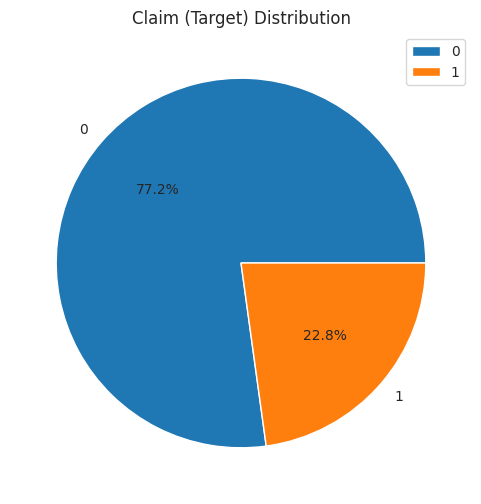

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(train_data['Claim'].value_counts(), labels=['0', '1'], autopct='%1.1f%%')
plt.legend()
plt.title('Claim (Target) Distribution')
plt.show()

From the pie chart, the target claim distribution is unbalanced. Only 22.8% of the buildings have atleast 1 claim during a specific period of time and 77.2% have no claim.

#### Frequency Analysis of Categorical features

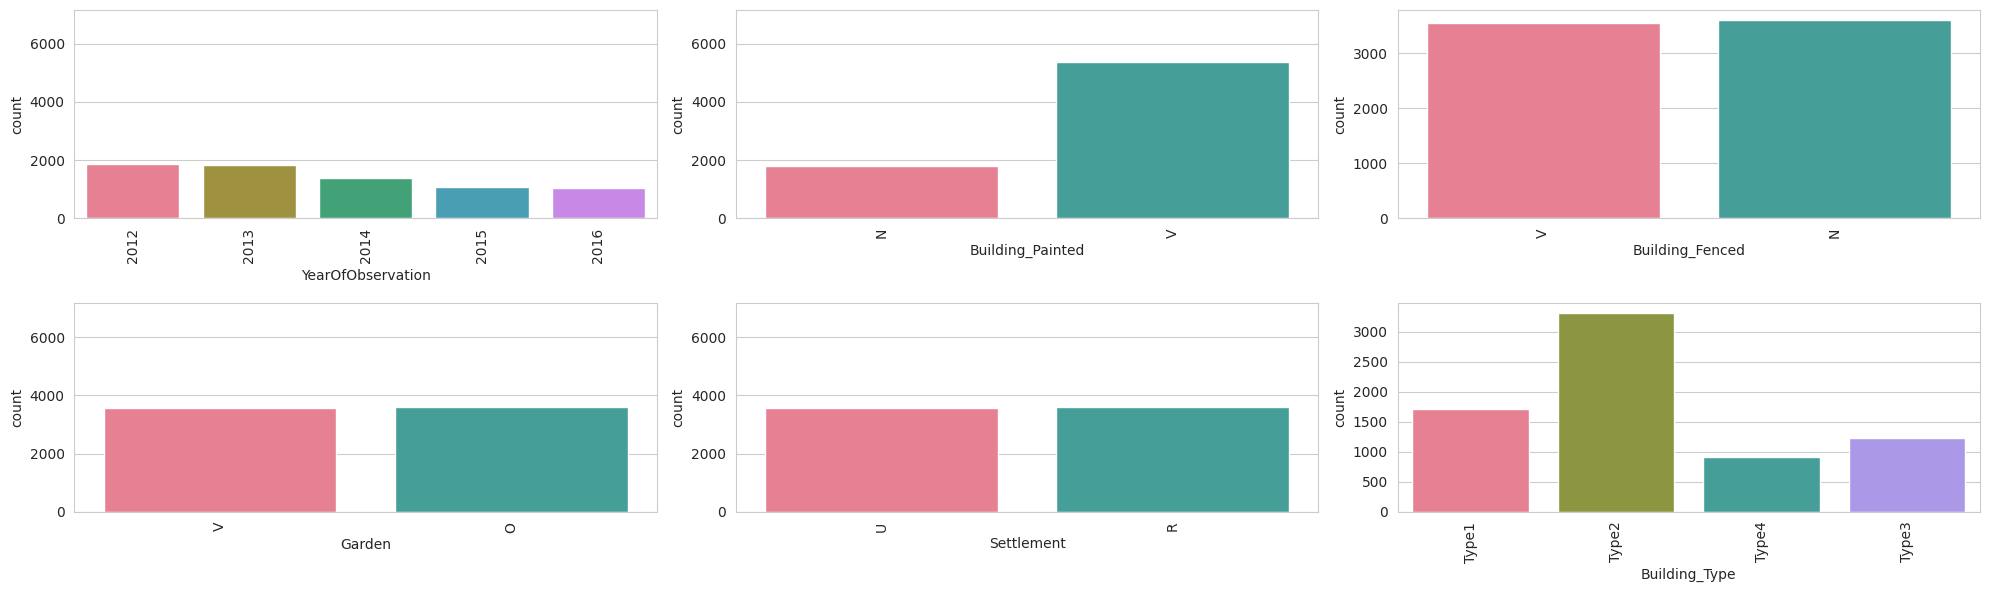

In [ ]:
# Create subplots
plt.figure(figsize=(20, 20))
gridspec = plt.GridSpec(7, 3)
locator1, locator2 = [0, 0]

for column in categorical_cols:
    if column != 'Geo_Code':
      plt.subplot(gridspec[locator1, locator2])
      sns.countplot(data=train_data, x=column, palette='husl')
      plt.xticks(rotation=90)

      locator2 += 1
      if locator2 == 3:
          locator1 += 1
          locator2 = 0
          continue
      if locator1 == 7:
          break

      # Set the y-axis limits to display more values
      plt.ylim(0, len(train_data))  # You can adjust the range as needed

plt.tight_layout()
plt.show()

#### Frequency Analysis of Numerical Features

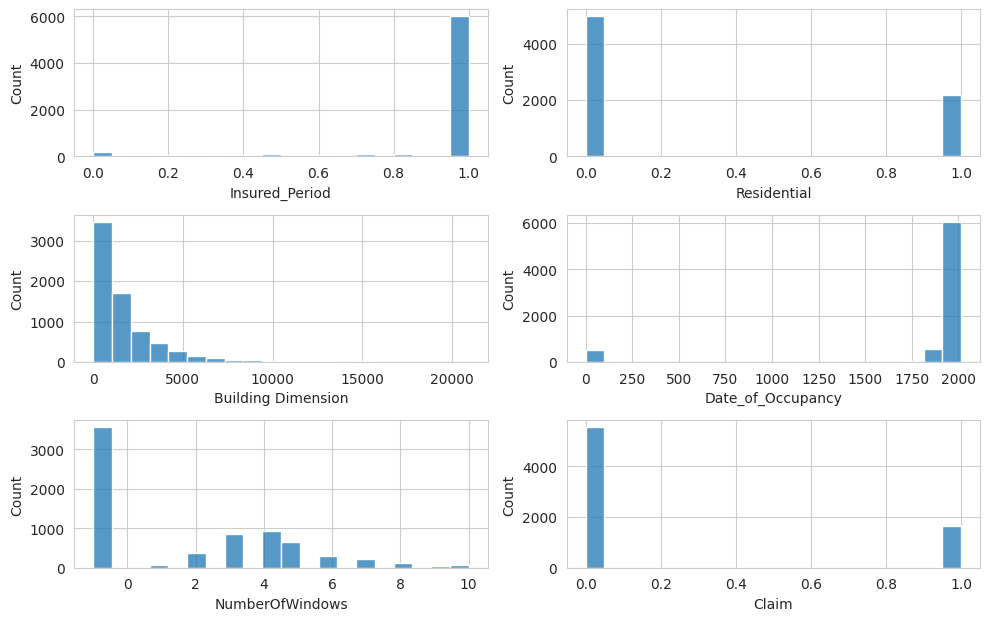

In [ ]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(train_data[column], bins=20)
plt.tight_layout()
plt.show()

#### Encoding categorical variables in the train dataset

In [ ]:
categorical_feat = ["YearOfObservation", "Building_Painted", "Building_Fenced", "Garden", "Settlement",  "Building_Type"]
# One-Hot Encoding of categorical variables
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore')

# Fit the encoder on the categorical columns of the training data
encoder.fit(train_data[categorical_feat])

# Transform and replace the categorical columns in the training and test datasets
train_encoded = encoder.transform(train_data[categorical_feat])
test_encoded = encoder.transform(test_data[categorical_feat])

# We now need to convert these arrays back into DataFrames and concatenate them back with the original data
train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_feat))
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_feat))

# Reset index to allow concatenation as encoding can mess up the index
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Concatenate the encoded columns back to the data
train_data = pd.concat([train_data.drop(categorical_feat, axis=1), train_encoded_df], axis=1)
test_data = pd.concat([test_data.drop(categorical_feat, axis=1), test_encoded_df], axis=1)

# Display the first few rows of the updated DataFrames to confirm changes
train_data_head = train_data.head()
test_data_head = test_data.head()
(train_data_head, test_data_head)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(   Insured_Period  Residential  Building Dimension  Date_of_Occupancy  \
 0             1.0          0.0               290.0             1960.0   
 1             1.0          0.0               490.0             1850.0   
 2             1.0          0.0               595.0             1960.0   
 3             1.0          0.0              2840.0             1960.0   
 4             1.0          0.0               680.0             1800.0   
 
    NumberOfWindows Geo_Code  Claim  YearOfObservation_2013  \
 0             -1.0     1053      0                     1.0   
 1              4.0     1053      0                     0.0   
 2             -1.0     1053      0                     0.0   
 3             -1.0     1053      0                     1.0   
 4              3.0     1053      0                     0.0   
 
    YearOfObservation_2014  YearOfObservation_2015  YearOfObservation_2016  \
 0                     0.0                     0.0                     0.0   
 1                

In [ ]:
train_data.head()

,Insured_Period,Residential,Building Dimension,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,YearOfObservation_2013,YearOfObservation_2014,YearOfObservation_2015,YearOfObservation_2016,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_Type2,Building_Type_Type3,Building_Type_Type4
0,1.0,0.0,290.0,1960.0,-1.0,1053,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,490.0,1850.0,4.0,1053,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,595.0,1960.0,-1.0,1053,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,2840.0,1960.0,-1.0,1053,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,680.0,1800.0,3.0,1053,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Frequency encoding of Geo_Code column
frequency_map = train_data['Geo_Code'].value_counts(normalize=True).to_dict()
train_data['Geo_code_frequency'] = train_data['Geo_Code'].map(frequency_map)

#Frequency encoding of Geo_Code column for test dataset
frequency_map = test_data['Geo_Code'].value_counts(normalize=True).to_dict()
test_data['Geo_code_frequency'] = test_data['Geo_Code'].map(frequency_map)

In [ ]:
#frequency encoding for Date of Occupancy column
frequency_map = train_data['Date_of_Occupancy'].value_counts(normalize=True).to_dict()
train_data['Date_of_Occupancy_frequency'] = train_data['Date_of_Occupancy'].map(frequency_map)

#frequency encoding for Date of Occupancy column for test dataset
frequency_map = test_data['Date_of_Occupancy'].value_counts(normalize=True).to_dict()
test_data['Date_of_Occupancy_frequency'] = test_data['Date_of_Occupancy'].map(frequency_map)

In [ ]:
#Dropping Geo_Code
train_data.drop('Geo_Code', axis=1, inplace=True)
test_data.drop('Geo_Code', axis=1, inplace=True)

#### Scaling Numerical Columns

MinMaxScaler scales the data to a specific range (e.g., [0, 1])

In [ ]:
#Extract the Building Dimension column and reshape it
X = train_data["Building Dimension"].values.reshape(-1, 1)
# initialize the scaler
scaler = MinMaxScaler()
train_data["Building Dimension"] = scaler.fit_transform(X)
display(train_data.head())

,Insured_Period,Residential,Building Dimension,Date_of_Occupancy,NumberOfWindows,Claim,YearOfObservation_2013,YearOfObservation_2014,YearOfObservation_2015,YearOfObservation_2016,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_Type2,Building_Type_Type3,Building_Type_Type4,Geo_code_frequency,Date_of_Occupancy_frequency
0,1.0,0.0,0.013802,1960.0,-1.0,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000698,0.253911
1,1.0,0.0,0.023354,1850.0,4.0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000698,0.006844
2,1.0,0.0,0.028368,1960.0,-1.0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000698,0.253911
3,1.0,0.0,0.135584,1960.0,-1.0,0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000698,0.253911
4,1.0,0.0,0.032428,1800.0,3.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000698,0.003352


In [ ]:
#Extract the Building Dimension column and reshape it
X = test_data["Building Dimension"].values.reshape(-1, 1)
# initialize the scaler
scaler = MinMaxScaler()
test_data["Building Dimension"] = scaler.fit_transform(X)
display(test_data.head())

,Insured_Period,Residential,Building Dimension,Date_of_Occupancy,NumberOfWindows,YearOfObservation_2013,YearOfObservation_2014,YearOfObservation_2015,YearOfObservation_2016,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_Type2,Building_Type_Type3,Building_Type_Type4,Geo_code_frequency,Date_of_Occupancy_frequency
0,1.000000,0.0,0.009725,1960.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000978,0.265233
1,0.997268,0.0,0.009725,1960.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000978,0.265233
2,0.369863,0.0,0.025664,1960.0,-1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.000978,0.265233
3,1.000000,0.0,0.045667,2004.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000652,0.002607
4,1.000000,0.0,0.045667,2004.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000652,0.002607


### Explore the sample submission dataset

In [ ]:
#Explore the data structure of the sample submission dataset
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3068 entries, 0 to 3067
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer Id  3068 non-null   object
 1   Claim        3068 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.1+ KB


In [ ]:
#Show the first 5 rows of the dataset
sample_submission.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


### Feature Selection

In [ ]:
train_data.columns

Index(['Insured_Period', 'Residential', 'Building Dimension',
       'Date_of_Occupancy', 'NumberOfWindows', 'Claim',
       'YearOfObservation_2013', 'YearOfObservation_2014',
       'YearOfObservation_2015', 'YearOfObservation_2016',
       'Building_Painted_V', 'Building_Fenced_V', 'Garden_V', 'Settlement_U',
       'Building_Type_Type2', 'Building_Type_Type3', 'Building_Type_Type4',
       'Geo_code_frequency', 'Date_of_Occupancy_frequency'],
      dtype='object')

In [ ]:
X = train_data.drop(columns=['Claim'])
y = train_data['Claim']

#Feature selection using SelectKBest:
#Selects the top k features based on univariate statistical tests
k_best = SelectKBest(score_func=f_classif, k=12)
X_new = k_best.fit_transform(X, y)
selected_feature_indices = k_best.get_support(indices=True)
selected_columns = X.columns[selected_feature_indices]
X_new_df = X[selected_columns]
test_data_selected = test_data[selected_columns]
X_new_df.head()

,Insured_Period,Residential,Building Dimension,NumberOfWindows,Building_Painted_V,Building_Fenced_V,Garden_V,Settlement_U,Building_Type_Type2,Building_Type_Type4,Geo_code_frequency,Date_of_Occupancy_frequency
0,1.0,0.0,0.013802,-1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000698,0.253911
1,1.0,0.0,0.023354,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000698,0.006844
2,1.0,0.0,0.028368,-1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.000698,0.253911
3,1.0,0.0,0.135584,-1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.000698,0.253911
4,1.0,0.0,0.032428,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000698,0.003352


In [ ]:
#Feature selection using Recursive Feature Elimination (RFE):
#RFE: Recursively removes the least important features and selects the best subset.
model = LogisticRegression(max_iter = 1000)
rfe = RFE(model, n_features_to_select=12)
train_new = rfe.fit_transform(X, y)
# Get the indices of selected features
selected_feature_ = rfe.get_support(indices=True)

# Use the indices to extract the corresponding feature names
selected_cols = X.columns[selected_feature_]

# Create a new DataFrame with selected columns
train_new_df = X[selected_cols]
train_new_df.head()

,Insured_Period,Building Dimension,NumberOfWindows,YearOfObservation_2013,YearOfObservation_2014,YearOfObservation_2016,Building_Fenced_V,Settlement_U,Building_Type_Type2,Building_Type_Type3,Building_Type_Type4,Geo_code_frequency
0,1.0,0.013802,-1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000698
1,1.0,0.023354,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000698
2,1.0,0.028368,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000698
3,1.0,0.135584,-1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.000698
4,1.0,0.032428,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000698


I used the SelectKBest method and RFE to choose the top most 12 features from the 19. They both gave me different features with a few similarities. I decided to go with the list from the SelectKBest method because two of the models that I intend to train work well with univariate selection methods.

## Model Building

### Implementing SVM, Linear Regression, KNN, and Naive Bayes

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_new_df, y, test_size=0.2, random_state=42)

#Defining the models
svm_model = SVC(probability=True)
lr_model = LogisticRegression()
knn_model = KNeighborsClassifier()
nb_model = GaussianNB()

# Define parameter grids for each model
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']}
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
nb_param_grid = {}  # Naive Bayes has no hyperparameters to tune

# Perform Grid Search
svm_grid = GridSearchCV(svm_model, svm_param_grid, scoring='roc_auc', cv=3)
lr_grid = GridSearchCV(lr_model, lr_param_grid, scoring='roc_auc', cv=3)
knn_grid = GridSearchCV(knn_model, knn_param_grid, scoring='roc_auc', cv=3)
nb_grid = GridSearchCV(nb_model, nb_param_grid, scoring='roc_auc', cv=3)

# Fit the models
svm_grid.fit(X_train, y_train)
lr_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
nb_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=GaussianNB(), param_grid={}, scoring='roc_auc')

## Model Evaluation

SVM Validation AUC: 0.68
LR Validation AUC: 0.70
KNN Validation AUC: 0.65
NB Validation AUC: 0.66


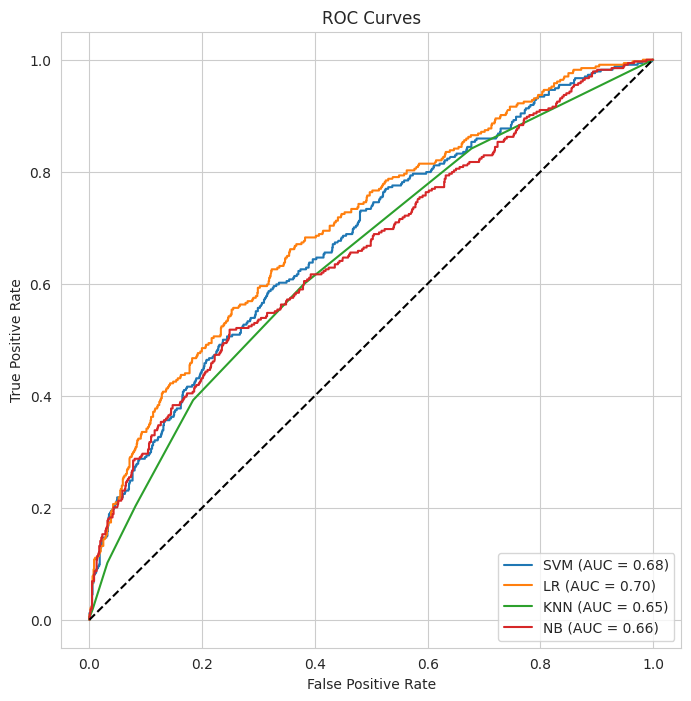

In [ ]:
# Evaluate models on the validation set
svm_val_auc = roc_auc_score(y_val, svm_grid.predict_proba(X_val)[:, 1])
lr_val_auc = roc_auc_score(y_val, lr_grid.predict_proba(X_val)[:, 1])
knn_val_auc = roc_auc_score(y_val, knn_grid.predict_proba(X_val)[:, 1])
nb_val_auc = roc_auc_score(y_val, nb_grid.predict_proba(X_val)[:, 1])

print(f'SVM Validation AUC: {svm_val_auc:.2f}')
print(f'LR Validation AUC: {lr_val_auc:.2f}')
print(f'KNN Validation AUC: {knn_val_auc:.2f}')
print(f'NB Validation AUC: {nb_val_auc:.2f}')

#Visualize ROC curves
fpr_svm, tpr_svm, _ = roc_curve(y_val, svm_grid.predict_proba(X_val)[:, 1])
fpr_lr, tpr_lr, _ = roc_curve(y_val, lr_grid.predict_proba(X_val)[:, 1])
fpr_knn, tpr_knn, _ = roc_curve(y_val, knn_grid.predict_proba(X_val)[:, 1])
fpr_nb, tpr_nb, _ = roc_curve(y_val, nb_grid.predict_proba(X_val)[:, 1])

plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(svm_val_auc))
plt.plot(fpr_lr, tpr_lr, label='LR (AUC = {:.2f})'.format(lr_val_auc))
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(knn_val_auc))
plt.plot(fpr_nb, tpr_nb, label='NB (AUC = {:.2f})'.format(nb_val_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()



SVM has a validation AUC of 0.68.
Logistic Regression (LR) has a validation AUC of 0.70.
K-Nearest Neighbors (KNN) has a validation AUC of 0.65.
Naive Bayes (NB) has a validation AUC of 0.66.

LR has the highest AUC, indicating better discrimination performance followed by
SVM and NB.
KNN has the lowest AUC among the models.

## Re-training the Best Model using the entire training dataset

In [ ]:
#Linear Regression
lr_classifier = LogisticRegression()
lr_grid = GridSearchCV(lr_classifier, lr_param_grid, scoring='roc_auc', cv=3)
lr_grid.fit(X_new_df, y)
lr_entire_train_auc = roc_auc_score(y, lr_grid.predict_proba(X_new_df)[:, 1])
print(f'LR Entire Train AUC: {lr_entire_train_auc:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback

LR Entire Train AUC: 0.71


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##Making Predictions on the Test dataset using the best model

### Performing Feature selection on the test dataset

In [ ]:
#Making predictions on the test dataset
final_predictions_prob = lr_grid.predict_proba(test_data_selected)[:, 1]

# determine the threshold based on the validation set
# For example, using a threshold that maximizes the F1 score

fpr, tpr, thresholds = roc_curve(y_val, lr_grid.predict_proba(X_val)[:, 1])
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
threshold = thresholds[ix]

# Convert probabilities to binary output based on the chosen threshold
predictions = (final_predictions_prob >= threshold).astype(int)



## Submission Preparation

In [ ]:
# Prepare the submission file using the saved 'Customer_ID'
submission = pd.DataFrame({'Customer_Id': test_customer_id, 'Claim': predictions})
submission.to_csv('submission.csv', index=False)